# Property Price Prediction

**We are importing Libraries which we will use in our project**

1. Numpy: Numerical computing library for efficient array operations and mathematical functions.
2. Pandas: Data manipulation and analysis library for structured data like tables and time series.
3. Seaborn: Statistical data visualization library built on top of Matplotlib for creating attractive plots.
4. Matplotlib: Widely-used data visualization library for creating static, animated, and interactive plots.
5. Keras: High-level deep learning library with a user-friendly API for building and training neural networks.
6. Scikit-Learn: Comprehensive machine learning library with various algorithms and tools for classification, regression, and clustering.
7. TensorFlow: Popular library for machine learning and numerical computation, often used for deep learning models.

In [33]:
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [35]:
import pandas as pd
df = pd.read_excel('/content/sample_data/DATA RUMAH.xlsx', sheet_name='Sheet1')
df.head (2)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2


In [5]:
df1 = pd.read_excel('/content/sample_data/HARGA RUMAH JAKSEL.xlsx', sheet_name='Sheet1',header=1)
df1.head(1)

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL


In [6]:
df1.rename(columns={"JKT":"KT","JKM":"KM"},inplace=True)

In [7]:
df=pd.concat([df1[["HARGA","LT","LB","KT","KM"]],df[['HARGA', 'LT','LB',  'KT', 'KM']]])

In [8]:
df= df.drop(df[df.duplicated()].index.values).reset_index(drop=True)

In [9]:
print("Shape of Dataset ",df.shape)

Shape of Dataset  (1710, 5)


In [10]:
df.head(2)

,HARGA,LT,LB,KT,KM
0,19000000000,824,800,4,4
1,7600000000,278,350,4,4


In [11]:
# df.drop(columns=["NO","NAMA RUMAH"],inplace=True)

In [12]:
df.tail(2)

,HARGA,LT,LB,KT,KM
1708,19000000000,606,360,7,4
1709,10500000000,430,420,7,4


In [13]:
df.dtypes

HARGA    int64
LT       int64
LB       int64
KT       int64
KM       int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1710 non-null   int64
 1   LT      1710 non-null   int64
 2   LB      1710 non-null   int64
 3   KT      1710 non-null   int64
 4   KM      1710 non-null   int64
dtypes: int64(5)
memory usage: 66.9 KB


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [16]:
from sklearn.ensemble import RandomForestRegressor

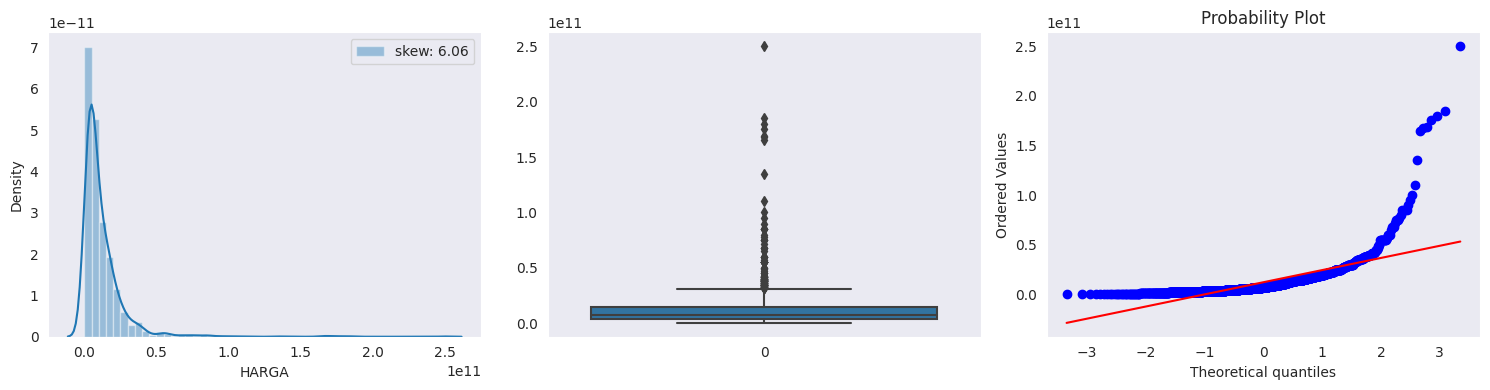

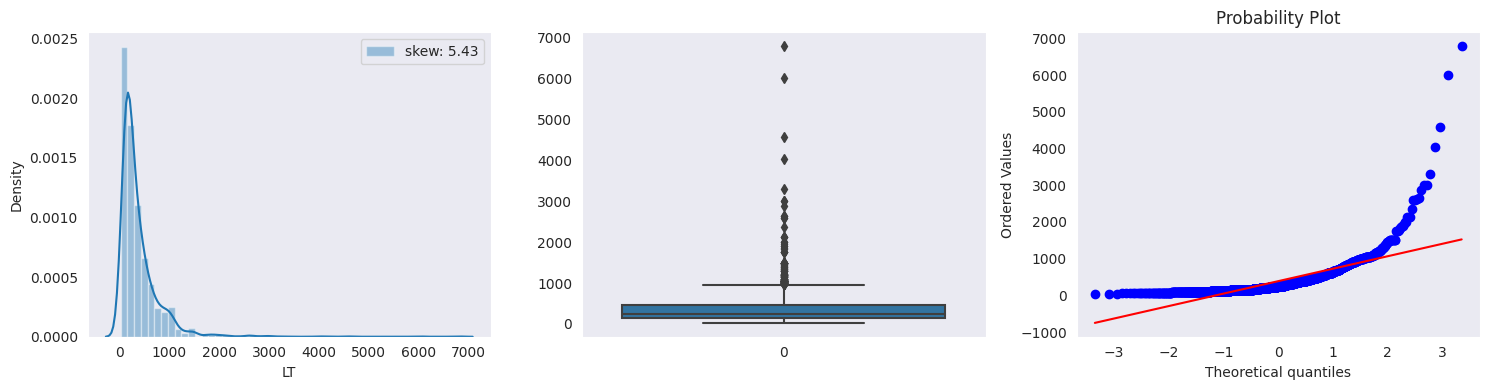

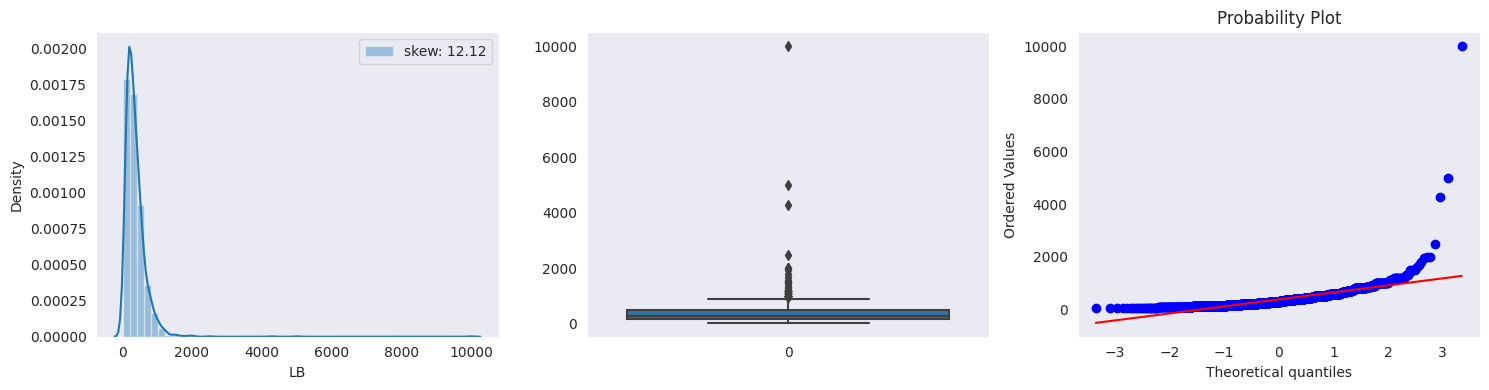

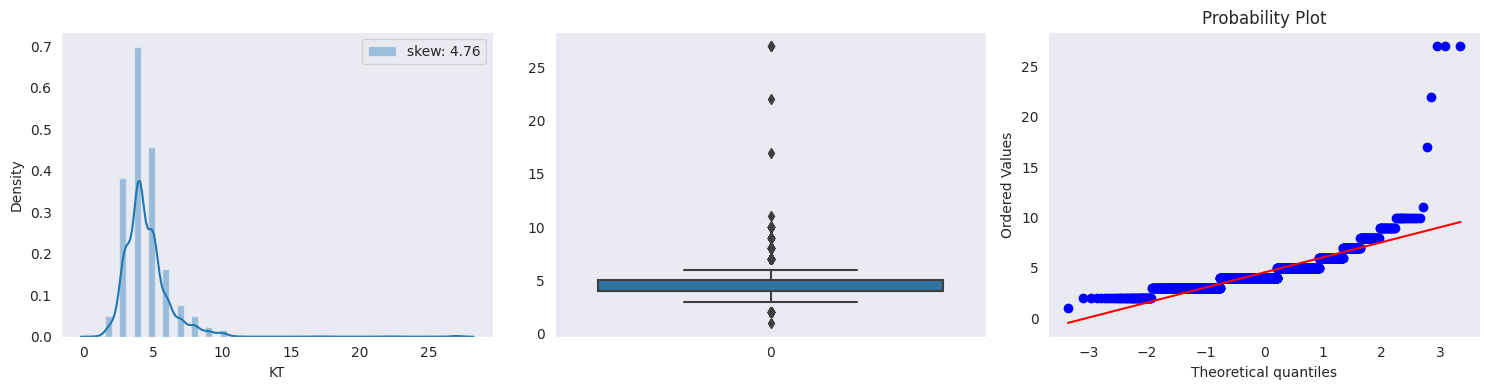

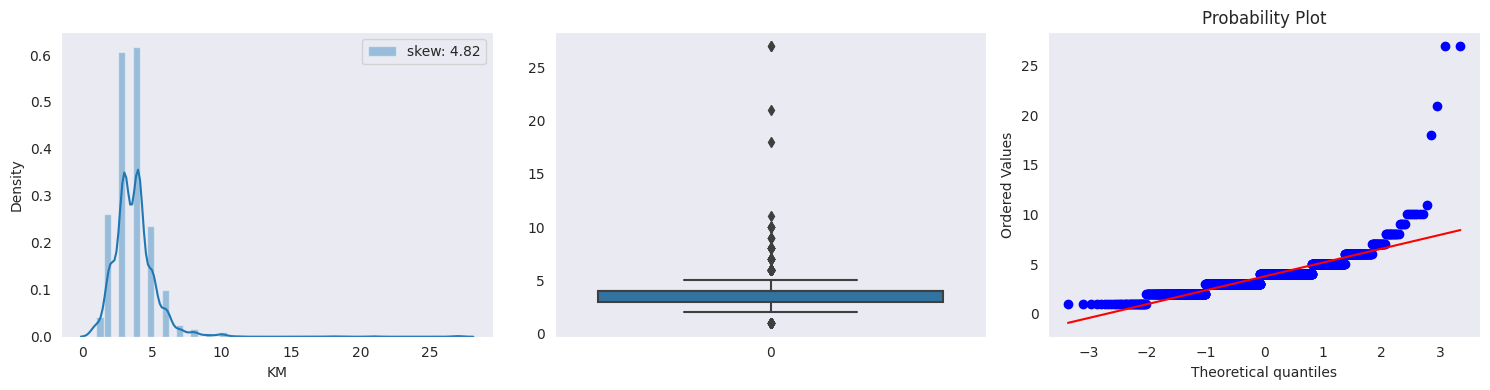

In [17]:
# import warnings 
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.simplefilter("ignore")
features = df.columns
import seaborn as sns
sns.set_style('dark')
for col in features:
  plt.figure(figsize=(15,4))
  plt.subplot(131)
  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
  plt.legend()
  plt.subplot(132)
  sns.boxplot(df[col])
  plt.subplot(133)
  stats.probplot(df[col],dist="norm", plot=plt)
  plt.tight_layout()
  plt.show()

In [18]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
      try:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(
            df[col] > upper_whisker,
            upper_whisker,
            np.where(
        df[col] < lower_whisker,
        lower_whisker,
        df[col]))
      except:
        pass
    return df
    

        
df = iqr_capping(df, df.columns[:], 1.5)


In [19]:
X= df.drop('HARGA',axis=1)
y=np.log(df['HARGA']+1)
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_validation, y_train, y__validation = train_test_split(X,y, random_state = 42, test_size = 0.2)

In [20]:

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.preprocessing import PowerTransformer,FunctionTransformer,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import numpy as np
from sklearn.feature_selection import SelectKBest,chi2


pt = PowerTransformer()
scaler = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,5))
])

In [21]:
pipe = Pipeline([

     ("pt",pt),

    ('scaler',scaler),
 
   
])

In [22]:
from sklearn import metrics
def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()
    
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print('R2 Score', round(r2_square,2))
    
    print('__________________________________')
   

In [23]:
from sklearn.linear_model import LogisticRegression
 
 
model_rf = RandomForestRegressor()
model_adaboost = AdaBoostRegressor()
model_lr = LinearRegression()
l = []
models = [("AdaBoostRegressor",model_adaboost),
          ("LinearRegression",model_lr),("RandomForestRegressor",model_rf)
          ]
 
for name,model in models:
  pipe_f = Pipeline([
      ('trf1',pipe),
      ('model',model),
       
  ])

  
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)
  pipe_f.fit(x_train,y_train)
  y_pred = pipe_f.predict(x_test)
  print("*"*10,name,"*"*10)
  print_evaluate(y_test,y_pred)

********** AdaBoostRegressor **********
R2 Score 0.82
__________________________________
********** LinearRegression **********
R2 Score 0.85
__________________________________
********** RandomForestRegressor **********
R2 Score 0.85
__________________________________


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

  
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, np.log(y), test_size=0.2, random_state=42)
num_features =X.shape[1]

# Reshape the input data if necessary
X_train = X_train.reshape(-1, num_features, 1)
X_test = X_test.reshape(-1, num_features, 1)

# Normalize input data if needed
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')  # Assuming regression problem
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/10
43/43 [==============================] - 2s 8ms/step - loss: 7.2065 - mae: 2.6502 - val_loss: 18450.3125 - val_mae: 111.5688
Epoch 2/10
43/43 [==============================] - 0s 4ms/step - loss: 1.9122 - mae: 1.2020 - val_loss: 201359.5625 - val_mae: 373.1483
Epoch 3/10
43/43 [==============================] - 0s 5ms/step - loss: 0.6018 - mae: 0.6545 - val_loss: 250418.1719 - val_mae: 418.9193
Epoch 4/10
43/43 [==============================] - 0s 4ms/step - loss: 0.4559 - mae: 0.5583 - val_loss: 212572.9531 - val_mae: 386.8353
Epoch 5/10
43/43 [==============================] - 0s 4ms/step - loss: 0.3530 - mae: 0.4875 - val_loss: 180381.4062 - val_mae: 356.6900
Epoch 6/10
43/43 [==============================] - 0s 4ms/step - loss: 0.2685 - mae: 0.4231 - val_loss: 158703.6094 - val_mae: 334.7169
Epoch 7/10
43/43 [==============================] - 0s 4ms/step - loss: 0.2013 - mae: 0.3622 - val_loss: 143410.0312 - val_mae: 317.9915
Epoch 8/10
43/43 [========================

In [25]:
# export 
import pickle
final = Pipeline([
    ('pipe',pipe),

    ('model',model_rf),
   
])
pickle.dump(final,open('pipe.pkl','wb'))

In [26]:
df.head(1)

,HARGA,LT,LB,KT,KM
0,1.900000e+10,824.0,800.0,4.0,4.0


**Final Prediction Result**

In [27]:
np.exp(final.predict([df.head(1).values[0][1:]]))[0]

19488199608.535847

# Recommendation System 

We use Cosine Similarity & K-Nearest Neighbor methods 

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

## Using Cosine Similarity

In [29]:
similarity_matrix = cosine_similarity(X, [[967.75, 700.  ,   5.  ,   5.5 ]])

# Get the indices of the most similar instances
similar_indices = similarity_matrix.argsort(axis=0)[-10:-5].flatten()
# Retrieve the similar instances from the original DataFrame
similar_instances = df.iloc[similar_indices]

similar_instances

,HARGA,LT,LB,KT,KM
275,3.000000e+10,557.0,400.0,4.0,3.0
279,3.150000e+10,836.0,600.0,4.0,4.0
326,1.600000e+10,835.0,600.0,5.0,5.0
549,1.850000e+10,965.0,700.0,4.0,3.0
134,1.930000e+10,965.0,700.0,5.0,3.0


## Using KNN

In [30]:
k = 5  # Number of nearest neighbors to consider
knn = NearestNeighbors(n_neighbors=k)
new_instance = [[967.75, 700.  ,   5.  ,   5.5 ]]
knn.fit(X.values)

# Find the indices of the most similar instances
distances, indices = knn.kneighbors(new_instance)

# Retrieve the similar instances from the original DataFrame
similar_instances = df.iloc[indices[0]]

similar_instances

,HARGA,LT,LB,KT,KM
703,3.150000e+10,965.0,700.0,5.0,5.0
294,3.150000e+10,965.0,700.0,6.0,5.5
147,2.100000e+10,965.0,700.0,5.0,4.0
1677,2.300000e+10,965.0,700.0,4.0,4.0
17,3.150000e+10,965.0,700.0,4.0,4.0
